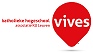<br>


**Machine Learning Fundamentals**<br>
Academiejaar 2021-2022<br>
Andy Louwyck<br>
Stefaan Haspeslagh

---



---



# ONS EERSTE NEURAAL NETWERK IN KERAS

Regressieprobelemen kunnen we ook met een artificiële neurale netwerken oplossen. In feite is de enkelvoudige lineaire regressie die we met Stochastic Gradient Descent hebben opgelost het meest eenvoudige neurale netwerk die we kunnen opstellen. In deze notebook demonstreren we dit door onze LinkedIn dataset te fitten m.b.v. [Keras](https://keras.io/), een Python interface voor Deep Learning, die gebruik maakt van TensorFlow, Google Brain's Machine Learning library. In het vak Deep Learning gaan we dieper in op neurale netwerken en daar gebruiken we ook Keras.

## De LinkedIn dataset

We lezen de "LinkedIn" dataset in als Pandas DataFrame: 

In [1]:
import pandas as pd

linkedin = pd.read_csv("./datasets/linkedIn.csv")
linkedin.head()

,loon,connecties
0,3252,304
1,2968,216
2,2976,159
3,3255,273
4,1953,191


Het aantal connecties is de onafhankelijke variabele $x$, het maandloon de afhankelijke variabele $y$.

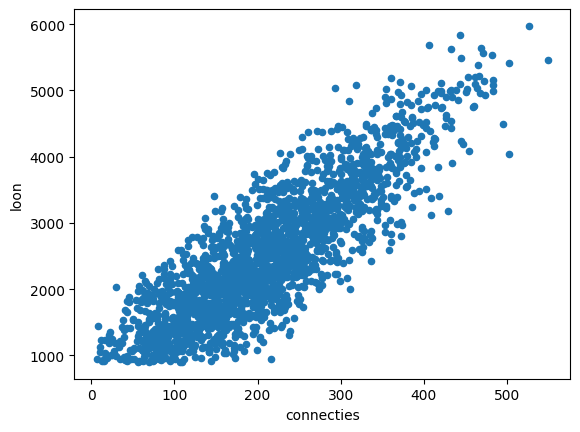

In [2]:
linkedin.plot.scatter(x="connecties", y="loon");

We gaan de variabelen herschalen door ze te delen door hun respectievelijke maximum:

In [3]:
import numpy as np

x = linkedin.connecties.values / linkedin.connecties.max()
y = linkedin.loon.values / linkedin.loon.max()

Keras modellen verwachten 2D arrays als input: de rijen zijn het aantal samples, de kolommen de features.

In [4]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]

## Keras `Sequential` model definiëren

Voor enkelvoudige lineaire regressie hebben we een neuraal netwerk nodig met slechts één neuron. In Keras definiëren we daarvoor een `Sequential` model met 1 `Dense` layer die 1 node bevat:

In [5]:
from tensorflow import keras
from keras import Sequential, layers

model = Sequential()  # Sequential is een klasse die we moeten instantiëren
model.add(layers.Dense(1))  # met add kunnen we een Dense layer toevoegen met 1 node

2023-05-01 14:55:45.750243: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-01 14:56:03.927858: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Keras model compileren

Tijdens het compileren van het model geven we de optimizer op. We nemen hier Stochastic Gradient Descent (SGD) met learning rate gelijk aan 0.001. We moeten ook een loss functie opgeven; we nemen hier de MSE.

In [6]:
sgd = keras.optimizers.SGD(learning_rate=0.001)  # SGD is ook een klasse die we moeten instantiëren  
model.compile(optimizer="SGD", loss="mse")

## Keras model trainen

Net als in Scikit-Learn moet je in Keras de `fit` methode van het model aanroepen om het te trainen. De eerste twee argumenten zijn uiteraard de examples en labels. We geven ook de batch size op, die we hier gelijk aan 1 nemen, wat wil zeggen dat we de datapunten één voor één gaan doorlopen. We geven ook het aantal epochs op. De `fit` methode retourneert een `History` object waarin we o.a. de waarden van de loss functie na elke epoch kunnen terugvinden.

In [93]:
history = model.fit(x, y, batch_size=1, epochs=20);

Epoch 1/20
2064/2064 [==============================] - 3s 1ms/step - loss: 0.0229
Epoch 2/20
2064/2064 [==============================] - 2s 1ms/step - loss: 0.0089
Epoch 3/20
2064/2064 [==============================] - 2s 1ms/step - loss: 0.0076
Epoch 4/20
2064/2064 [==============================] - 2s 1ms/step - loss: 0.0075
Epoch 5/20
2064/2064 [==============================] - 2s 1ms/step - loss: 0.0074
Epoch 6/20
2064/2064 [==============================] - 3s 1ms/step - loss: 0.0074
Epoch 7/20
2064/2064 [==============================] - 2s 1ms/step - loss: 0.0074
Epoch 8/20
2064/2064 [==============================] - 3s 1ms/step - loss: 0.0074
Epoch 9/20
2064/2064 [==============================] - 2s 1ms/step - loss: 0.0074
Epoch 10/20
2064/2064 [==============================] - 3s 1ms/step - loss: 0.0074
Epoch 11/20
2064/2064 [==============================] - 2s 1ms/step - loss: 0.0074
Epoch 12/20
2064/2064 [==============================] - 3s 1ms/step - loss: 0.0074
E

Laten we de loss eens plotten in functie van het aantal epochs:

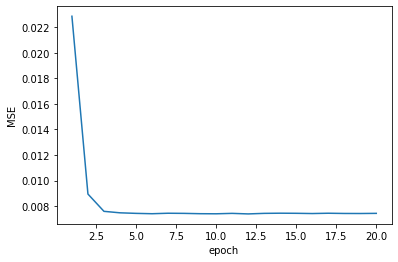

In [94]:
import matplotlib.pyplot as plt

loss = history.history['loss']
epochs = np.arange(1, len(loss)+1)
plt.plot(epochs, loss);
plt.xlabel('epoch');
plt.ylabel('MSE');

We zien dat de loss functie na een aantal epochs niet meer is verbeterd. In principe zouden we ook met een validatieset moeten werken om te zien of het model niet aan overfitting lijdt. En we zouden na het trainen het model moeten evalueren op een testset. Het opsplitsen van de dataset en het nut daarvan wordt verder in de cursus behandeld. 

In een neuraal netwerk netwerk worden de parameters ook gewichten genoemd. We vinden die terug in attribuut `weights` van ons model object. In dit geval is het eerste gewicht de rico en het tweede gewicht de intercept, wat hier "bias" wordt genoemd. Wat dit juist betekent wordt verder in de cursus uitvoerig besproken. De gewichten worden als TensorFlow variabelen opgeslagen. Met de methode `numpy` kunnen we ze omzetten naar NumPy arrays.

In [63]:
rico = model.weights[0].numpy()[0][0]
intercept = model.weights[1].numpy()[0]
print(rico, intercept)

0.8205179 0.12081814


## Voorspellingen maken

Net als in Scikit-Learn heeft het `Sequential` object een methode `predict` waarmee we voorspellingen kunnen maken met nieuwe data. Stel dat we willen voorspellen hoeveel iemand verdient met 252 LinkedIn connecties, dan doen we dit als volgt:

In [80]:
x_new = 252 / linkedin.connecties.max()  # niet vergeten te herschalen!
y_pred = model.predict([[x_new]])[0][0]  # ook hier werken we met 2D arrays...
y_pred * linkedin.loon.max()  # terug met het maximum vermenigvuldigen!

2945.366630792618

We mogen dus niet vergeten dat we de data hebben herschaald! Op dat herschalen gaan we verder in de cursus dieper in gaan. Onthoud alvast dat het meestal een goed idee is om de input van een neuraal netwerk op één of andere manier te normaliseren.